In [2]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

c:\program files\python\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### Load Google word2vec model

In [3]:
model_name = 'models/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_name, binary=True)

#### Load some sample vectors

In [12]:
dog_vector = model['dog']
cat_vector = model['cat']
king_vector = model['king']
queen_vector = model['queen']
man_vector = model['man']
woman_vector = model['woman']
banana_vector = model['banana']
apple_vector = model['apple']
quiz_vector = model['car']-model['cars']
quiz_vector2 = model['apple']-model['apples']
quiz_vector3 = model['family']-model['families']

#### (king - man) + woman = ?

In [13]:
print(model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))

[('queen', 0.7118192911148071)]


#### PCA dimensionality reduction for plotting the vectors

In [14]:
X = np.vstack((dog_vector, cat_vector, king_vector, queen_vector, man_vector, woman_vector, quiz_vector, quiz_vector2, quiz_vector3))
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#### Plot the vectors

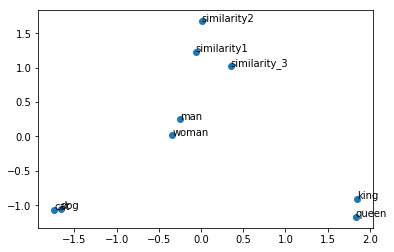

In [15]:
plt.scatter(result[:, 0], result[:, 1])
words = ['dog', 'cat', 'king', 'queen', 'man', 'woman', 'similarity1', 'similarity2', 'similarity_3']
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Stanford's GloVe Embedding

In [49]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'models/glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'models/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [50]:
# load the Stanford GloVe model

In [51]:
from gensim.models import KeyedVectors

filename = 'models/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

#### (king - man) + woman = ?

In [54]:
glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

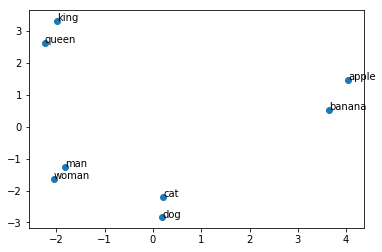

In [57]:
dog_vector = glove_model['dog']
cat_vector = glove_model['cat']
king_vector = glove_model['king']
queen_vector = glove_model['queen']
man_vector = glove_model['man']
woman_vector = glove_model['woman']
banana_vector = glove_model['banana']
apple_vector = glove_model['apple']
X = np.vstack((dog_vector, cat_vector, king_vector, queen_vector, man_vector, woman_vector, banana_vector, apple_vector))
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = ['dog', 'cat', 'king', 'queen', 'man', 'woman', 'banana', 'apple']
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Train own word2vec skip-gram model

#### Import and clean text data

In [4]:
import re
with open('data/star_wars5_plot.txt', 'r') as f:
    raw_data = f.read()
    
clean_data = re.sub(r'[^a-zA-Z0-9?!.-]|[\.]{2,}', ' ', raw_data) # remove non-word characters but keep punctuation
clean_data = re.sub(r'\s{2,}', ' ', clean_data)  # remove two or more consecutive whitespaces
clean_data

'Three years after the destruction of the Death Star the Rebel Alliance has been driven from their former base on Yavin IV by the Galactic Empire. The rebels led by Princess Leia have set up a new base on the ice planet Hoth. The Imperial fleet led by Darth Vader continues to hunt for the Rebels new base by dispatching probe droids across the galaxy. Luke Skywalker is captured by a wampa while investigating one such probe but he manages to escape from the wampa s cave with his lightsaber. Before Luke succumbs to the freezing temperatures the Force ghost of his late mentor Obi-Wan Kenobi instructs him to go to the Dagobah system to train under Jedi Master Yoda. Luke is found by Han Solo who cuts open a Tauntaun that Han rode on to help keep Luke warm and the duo is eventually rescued by a search party. Meanwhile the probe alerts the Imperial fleet to the rebels location. The Empire launches a large-scale attack using AT-AT Walkers to capture the base which forces the rebels to retreat. 

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

sentence_list = sent_tokenize(clean_data)
stop_words = set(stopwords.words('english'))

vocab = []
for sentence in sentence_list:
    clean_sentence = sentence.replace('.', '').lower()
    tokenized_sentence = word_tokenize(clean_sentence)
    filtered_sentence = [word for word in tokenized_sentence if not word in stop_words]    
    vocab.append(filtered_sentence)
vocab

[['three',
  'years',
  'destruction',
  'death',
  'star',
  'rebel',
  'alliance',
  'driven',
  'former',
  'base',
  'yavin',
  'iv',
  'galactic',
  'empire'],
 ['rebels',
  'led',
  'princess',
  'leia',
  'set',
  'new',
  'base',
  'ice',
  'planet',
  'hoth'],
 ['imperial',
  'fleet',
  'led',
  'darth',
  'vader',
  'continues',
  'hunt',
  'rebels',
  'new',
  'base',
  'dispatching',
  'probe',
  'droids',
  'across',
  'galaxy'],
 ['luke',
  'skywalker',
  'captured',
  'wampa',
  'investigating',
  'one',
  'probe',
  'manages',
  'escape',
  'wampa',
  'cave',
  'lightsaber'],
 ['luke',
  'succumbs',
  'freezing',
  'temperatures',
  'force',
  'ghost',
  'late',
  'mentor',
  'obi-wan',
  'kenobi',
  'instructs',
  'go',
  'dagobah',
  'system',
  'train',
  'jedi',
  'master',
  'yoda'],
 ['luke',
  'found',
  'han',
  'solo',
  'cuts',
  'open',
  'tauntaun',
  'han',
  'rode',
  'help',
  'keep',
  'luke',
  'warm',
  'duo',
  'eventually',
  'rescued',
  'search',
 

### Define parameters for word2vec

* *sg*: Training algorithm: 1 for skip-gram; otherwise CBOW.
* _size_: Dimensionality of the word vectors - optional
* *min_count*: Ignores all words with total frequency lower than this. (__Be careful with this value. If you choose it too high, your vocabulary might be emtpy, which results in an RuntimeError!__)
* *window*: Maximum distance between the current and predicted word within a sentence.
* *workers*: Use these many worker threads to train the model (=faster training with multicore machines).


In [6]:
my_model = Word2Vec(vocab, sg=1, size=100, window=10, min_count=2, workers=4)
"Vocabulary length {}".format(len(my_model.wv.vocab))

'Vocabulary length 52'

#### Get the word vector of a word inside your vocabulary

In [43]:
my_model['c-3po']

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.1239216e-03, -2.9491929e-03, -2.4816315e-03, -2.2725007e-03,
       -1.0469813e-03, -2.1502601e-03, -1.2108566e-03, -5.2717322e-04,
       -2.1266588e-03,  4.0085781e-03, -2.5032775e-03, -4.6563619e-03,
       -3.9774091e-03, -4.6769626e-04, -6.7457813e-04, -1.9406892e-03,
        4.3148589e-03,  4.1764304e-03, -4.8157629e-03,  7.9170539e-05,
        4.9420041e-03, -7.0544361e-04, -3.9103711e-03, -1.2146682e-03,
        3.2083089e-03,  3.0356804e-03, -4.3416829e-03,  3.5778680e-03,
        4.8111263e-04, -3.3024151e-03,  3.9416971e-04,  2.6688201e-04,
        4.5712693e-03, -1.9232577e-03, -3.6760340e-03, -2.8153236e-03,
       -7.4606977e-04,  8.6084090e-04,  1.4718383e-04, -8.6244504e-04,
       -3.8859160e-03, -1.5126696e-03,  4.2652306e-03, -3.1135299e-03,
       -4.6150428e-03,  2.2078231e-04,  3.8843309e-03, -9.4175956e-04,
        4.7097118e-03, -1.6539331e-03, -1.3299118e-03, -1.2938973e-03,
        1.0757941e-03,  2.8229458e-03,  3.5445241e-03, -2.3789136e-03,
      

#### Plot the model

c:\program files\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


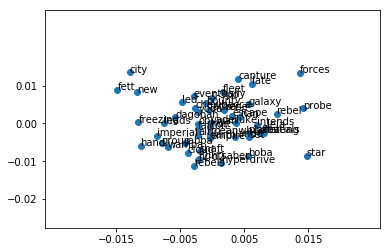

In [54]:
#X = np.vstack((vader_vector, luke_vector, leia_vector, han_vector, lando_vector, chewbacca_vector, rebel_vector, empire_vector))
X = my_model[my_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
#words = ['vader', 'luke', 'leia', 'han', 'lando', 'chwebacca', 'rebel', 'empire']
words = list(my_model.wv.vocab)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#plt.xticks(np.arange(-0.015, 0.02, 0.01))
#plt.yticks(np.arange(-0.02, 0.02, 0.01))
plt.axis([xmin,xmax,ymin,ymax])

plt.show()

#### Prediction of words

In [45]:
my_model.predict_output_word(['luke', 'vader'] , topn=5)

[('city', 0.019230999),
 ('galaxy', 0.019230962),
 ('lightsaber', 0.019230956),
 ('freezing', 0.01923093),
 ('intends', 0.01923093)]

In [46]:
my_model.most_similar(positive=['luke', 'vader'], negative=['yoda'], topn=1)

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('eventually', 0.22264927625656128)]

In [47]:
my_model.similarity('r2-d2', 'c-3po')

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.11906512420639152

In [48]:
my_model.similar_by_word('luke', topn=10)

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('floating', 0.2418631762266159),
 ('escape', 0.21594427525997162),
 ('group', 0.10974230617284775),
 ('eventually', 0.08781595528125763),
 ('forces', 0.08435332775115967),
 ('hutt', 0.08137577772140503),
 ('late', 0.07927335798740387),
 ('lightsaber', 0.07708470523357391),
 ('leia', 0.07158423215150833),
 ('rebel', 0.0688922330737114)]